# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [3]:
import pandas as pd

## imports for Python, Pandas

In [6]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [9]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [10]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## Load the JSON data

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

In [107]:
# specify the path to the JSON file
filename = 'data\world_bank_projects.json'

# load the JSON data into a list of dicts
with open(filename, 'r') as json_file:
    json_data = json.load(json_file)

## Solution to Task 1

In [108]:
# Create a DataFrame, without using normalization
df = pd.read_json(filename)

In [109]:
# count the number of rows for each countryname value.
num_projects_by_countryname = df['countryname'].value_counts()

# convert the Series back into a DataFrame for readability
num_projects_by_countryname =  num_projects_by_countryname.to_frame('count').rename_axis('countryname')

In [110]:
# print the first 10 rows.
solution_1 = num_projects_by_countryname.head(10)
print(solution_1)

                                 count
countryname                           
People's Republic of China          19
Republic of Indonesia               19
Socialist Republic of Vietnam       17
Republic of India                   16
Republic of Yemen                   13
People's Republic of Bangladesh     12
Nepal                               12
Kingdom of Morocco                  12
Republic of Mozambique              11
Africa                              11


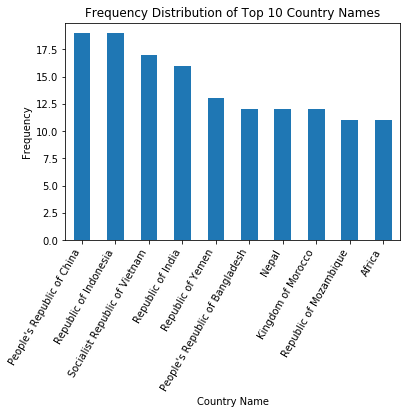

In [111]:
# make a bar chart of the top 10 country names
solution_1.plot(kind='bar',title='Frequency Distribution of Top 10 Country Names',legend=None)
plt.xlabel('Country Name')
plt.ylabel('Frequency')
plt.xticks(rotation=60,ha='right')
plt.show()

## Solution to Task 2

In [112]:
# create a DataFrame from nested elements in mjtheme_namecode
df_2 = json_normalize(json_data, 'mjtheme_namecode')

In [113]:
# count the number of rows for each code, print the top 10 results.  
solution_2 = df_2['code'].value_counts().to_frame('count').rename_axis('code').head(10)
print(solution_2)

      count
code       
11      250
10      216
8       210
2       199
6       168
4       146
7       130
5        77
9        50
1        38


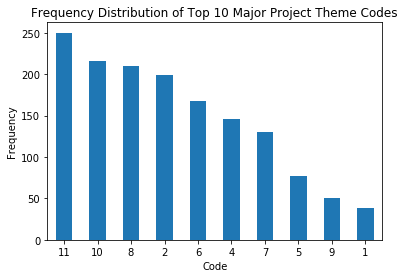

In [114]:
# create a bar chart of the top 10 theme codes
solution_2.plot(kind='bar',title='Frequency Distribution of Top 10 Major Project Theme Codes',legend=None)
plt.xlabel('Code')
plt.ylabel('Frequency')
plt.xticks(rotation='horizontal')
plt.show()

## Solution to Task 3

In [115]:
# Create a DataFrame, without using normalization
df_3 = pd.read_json(filename)

In [116]:
# create a dict with mjtheme codes as keys and non-empty names as values.
names = df_2[df_2.name != '']
names = names.drop_duplicates().set_index('code')
dict_mjthemes = names['name'].to_dict()

In [117]:
# print the dict that maps codes to names.  NOTE: keys are strings
dict_mjthemes

{'1': 'Economic management',
 '10': 'Rural development',
 '11': 'Environment and natural resources management',
 '2': 'Public sector governance',
 '3': 'Rule of law',
 '4': 'Financial and private sector development',
 '5': 'Trade and integration',
 '6': 'Social protection and risk management',
 '7': 'Social dev/gender/inclusion',
 '8': 'Human development',
 '9': 'Urban development'}

In [118]:
# create a custom function to iterate through a list of dicts
def fill_name(list_of_dicts,code_name):
    """fill_name takes a list of dicts with keys 'code' and 'name',
    and a dict that maps each code to the correct name as input.  
    This function iterates through the list, and replaces each
    empty name string with the correct name.  
    This function returns a list of dicts."""
    
    # initialize an empty list
    l_out = []
    
    # Iterate over the list of dicts
    for d in list_of_dicts:
        if d['name'] == '':
            d['name'] = code_name[d['code']]
        l_out.append(d)
    
    # return the new list with the correct names
    return l_out           

In [119]:
# fill in the empty strings in the DataFrame column mjtheme_namecode
df_3['mjtheme_namecode'] = df_3['mjtheme_namecode'].apply(fill_name,args=(dict_mjthemes,))